<a href="https://colab.research.google.com/github/ericaburdett/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# The usual imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Set up sales list
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
# Define a function to return all necessary values

def metrics(a_list):
  # Calculate mean
  mean = sum(a_list) / len(a_list)

  # Calculate variance
  sq_dist = []
  for i in range(len(a_list)):
    sq_dist.append((a_list[i] - mean) ** 2)
    var = sum(sq_dist) / len(sq_dist)

  # Calculate standard deviation
  st_dev = np.sqrt(var)

  print("Mean: {}".format(mean))
  print("Variance: {}".format(var))
  print("Standard Deviation: {}".format(st_dev))

In [72]:
# Checking my work
print(np.mean(sales))
print(np.var(sales))
print(np.std(sales))
metrics(sales)

3052.714285714286
183761.06122448976
428.67360686714756
Mean: 3052.714285714286
Variance: 183761.06122448976
Standard Deviation: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [76]:
# Set up customers
customers = [127, 80, 105, 92, 120, 115, 93]

# Find covariance
sales_cov = np.cov(sales, customers)

print("Covariance: {}".format(sales_cov[0][1]))

Covariance: 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [101]:
# Define function to find standard deviation
def std_dev(a_list):  
  # Calculate mean
  mean = sum(a_list) / len(a_list)

  # Calculate variance
  sq_dist = []
  for i in range(len(a_list)):
    sq_dist.append((a_list[i] - mean) ** 2)
  var = sum(sq_dist) / ((len(sq_dist))-1)

  # Calculate standard deviation
  st_dev = np.sqrt(var)

  return st_dev

cust_std_dev = std_dev(customers)
sales_std_dev = std_dev(sales)
print(cust_std_dev)
print(sales_std_dev)

17.057326313123664
463.0204150595357


In [102]:
# Calculate denominator to calculate correlation coefficient
denom = cust_std_dev * sales_std_dev

# Calculate correlation coefficient
corr_sc = sales_cov[0][1] / denom

print("Correlation coefficient: {}".format(corr_sc))

Correlation coefficient: 0.9628339778148909


In [104]:
# Check work with pandas
print(pd.Series(sales).corr(pd.Series(customers)))

0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [106]:
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [107]:
# Extract numeric columns
numeric = titanic.select_dtypes('number')

numeric.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [112]:
# Calculate var-covariance matrix
titanic_cov = numeric.cov()
print(titanic_cov)

                     Unnamed: 0      pclass  ...         body  has_cabin_number
Unnamed: 0        143117.500000  284.357034  ...   591.579132        -95.438885
pclass               284.357034    0.701969  ...    -2.876653         -0.249992
survived             -53.967125   -0.127248  ...     0.000000          0.061406
age                -1442.939812   -3.954605  ...    81.622922          1.463138
sibsp                 25.828746    0.053090  ...    -8.708471         -0.003946
parch                  1.172783    0.013287  ...     4.237190          0.013316
fare               -9410.735123  -24.227788  ...  -179.164684         10.976961
body                 591.579132   -2.876653  ...  9544.688567          3.625689
has_cabin_number     -95.438885   -0.249992  ...     3.625689          0.174613

[9 rows x 9 columns]


In [113]:
# Calculate correlation matrix
numeric.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [115]:
# Orthogonal vectors are perpendicular. Their dot product is zero.

# Set up two vectors
a = [1, 2]
b = [2, -1]

# Check that dot product equals zero
a_dot_b = np.dot(a, b)
print(a_dot_b)

0


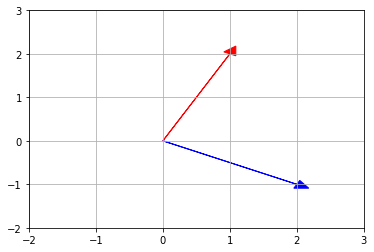

In [121]:
# Plot vectors with matplotlib

ax, fig = plt.subplots()
axes = plt.grid()
plt.xlim(-2, 3)
plt.ylim(-2, 3)

plt.arrow(0, 0, a[0], a[1],
          head_length=0.2,
          head_width=0.2,
          color='red')
plt.arrow(0, 0, b[0], b[1],
          head_length=0.2,
          head_width=0.2,
          color='blue')

plt.show()
# I think if the aspect ratio were square, these would appear orthogonal

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [122]:
# Set up vectors
a = [-5, 3, 7]
b = [6, -8, 2]

# Find dot product
a_dot_b = np.dot(a, b)
print(a_dot_b)

# Because the dot product is not 0, the vectors are not orthogonal

-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [129]:
# Set up vector
c = np.array([2, -15, 6, 20])

# Calculate norm
c_norm = np.linalg.norm(c)
c_norm_sq = c_norm ** 2

print(c_norm_sq)

665.0


In [130]:
# Calculate dot product
c_dot_c = np.dot(c, c)
print(c_dot_c)

665


In [131]:
# Calculate product of c_T and c
c_T_c = np.matmul(c.T, c)
print(c_T_c)

665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In Linear Algebra a unit vector is any vector of "unit length" (1). You can turn any non-zero vector into a unit vector by dividing it by its norm (length/magnitude).

for example if I have the vector 

\begin{align}
 b = \begin{bmatrix} 1 \\ 2 \\  2 \end{bmatrix}
\end{align}

 and I want to turn it into a unit vector, first I will calculate its norm
 
 \begin{align}
 ||b|| = \sqrt{1^2 + 2^2 + 2^2} = \sqrt{1 + 4 + 4} = \sqrt{9} = 3
\end{align}

I can turn b into a unit vector by dividing it by its norm. Once something has been turned into a unit vector we'll put a ^ "hat" symbol over it to denote that it is now a unit vector.

 \begin{align}
 \hat{b} = \frac{1}{||b||}b = \frac{1}{3}\begin{bmatrix} 1 \\ 2 \\  2 \end{bmatrix} = \begin{bmatrix} \frac{1}{3} \\ \frac{2}{3} \\  \frac{2}{3} \end{bmatrix}
\end{align}



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

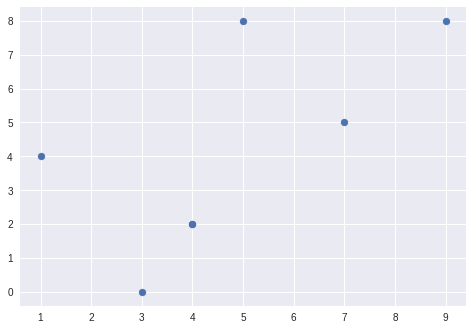

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()